In [1115]:
!pip install plotly
import warnings
warnings.filterwarnings('ignore')

In [1116]:
#DATA UNDERSTANDING AND EXPLORATION
import pandas as pd
import numpy as np

In [1117]:
#Reading the dataset
dataset =pd.read_csv("bikes.csv")

In [1118]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1119]:
dataset.shape

(730, 16)

In [1120]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1121]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1123]:
#Assigning string values to different seasons instead of numeric values
#1 = Spring
dataset.loc[(dataset['season'] ==1), 'season'] = 'spring'
#2 = Summer
dataset.loc[(dataset['season'] ==2), 'season'] = 'summer'
#3 = fall
dataset.loc[(dataset['season'] ==3), 'season'] = 'fall'
#4 = winter
dataset.loc[(dataset['season'] ==4), 'season'] = 'winter'

In [1124]:
dataset['season'].astype('category').value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [1125]:
#0 = 2018, 1=2019 :Year
dataset['yr'].astype('category').value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [1126]:
#Assigning string values to different months instead of numeric values
def object_map_mnths(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [1127]:
dataset[['mnth']] = dataset[['mnth']].apply(object_map_mnths)

In [1128]:
dataset['mnth'].astype('category').value_counts()

mnth
Aug    62
Dec    62
Jan    62
Jul    62
Mar    62
May    62
Oct    62
Apr    60
Jun    60
Nov    60
Sep    60
Feb    56
Name: count, dtype: int64

In [1129]:
dataset['holiday'].astype('category').value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [1130]:
def str_map_weekday(x):
    return x.map({1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',7:'Sun'})

In [1131]:
dataset[['weekday']] =dataset[['weekday']].apply(str_map_weekday)

In [1132]:
dataset['weekday'].astype('category').value_counts()

weekday
Mon    105
Tue    105
Fri    104
Sat    104
Thu    104
Wed    104
Name: count, dtype: int64

In [1133]:
dataset['workingday'].astype('category').value_counts()

workingday
1    504
0    226
Name: count, dtype: int64

In [1136]:
#1 =Clear,few clouds,Partly Cloudly
dataset.loc[(dataset['weathersit'] ==1), 'weathersit']='A'
#2 = Mist,Cloudy
dataset.loc[(dataset['weathersit'] ==2),'weathersit'] = 'B'
#3 = LIght Snow,Heavy Rain
dataset.loc[(dataset['weathersit'] ==3),'weathersit'] = 'C'

In [1154]:
dataset['weathersit'].astype('category').value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

In [1156]:
#DATA VISUALISATION

In [1157]:
import matplotlib.pyplot as plt
import seaborn as sns

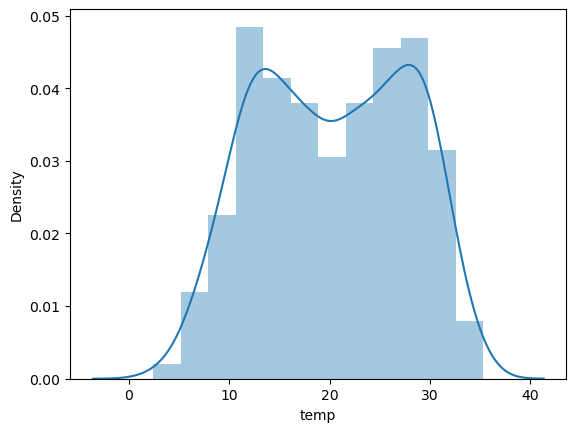

In [1158]:
#temp
sns.distplot(dataset['temp'])
plt.show()

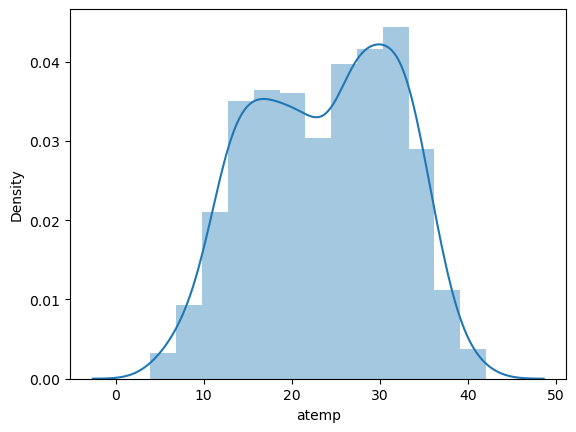

In [1159]:
#Actual temperature
sns.distplot(dataset['atemp'])
plt.show()

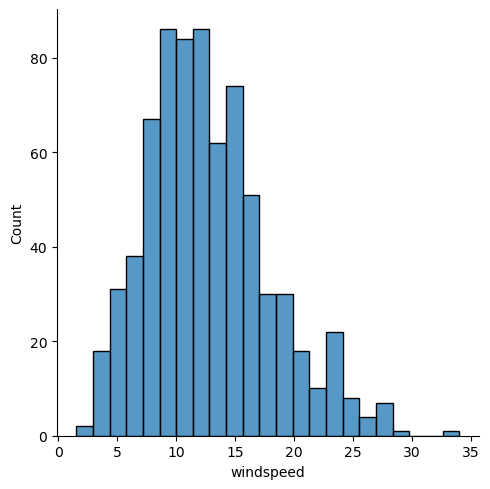

In [1163]:
#wind speed
sns.displot(dataset['windspeed'])
plt.show()

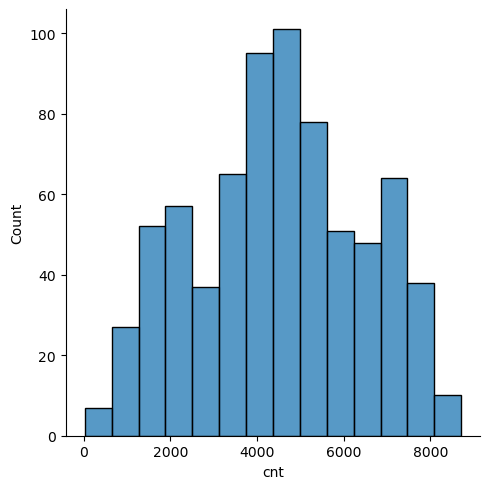

In [1165]:
#Target cariable:count of total rental bikes including both casual and registered
sns.displot(dataset['cnt'])
plt.show()

In [1167]:
#Converting date to datetime format
dataset['dteday'] = pd.to_datetime(dataset['dteday'])

ValueError: time data "13-01-2018" doesn't match format "%m-%d-%Y", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
dataset_categorical =dataset.select_dtypes(exclude=['float64','datetime64','int64'])

In [ ]:
dataset_categorical.columns

In [1171]:
dataset_categorical

,dteday,season,mnth,weekday,weathersit
0,01-01-2018,spring,Jan,Mon,B
1,02-01-2018,spring,Jan,Tue,B
2,03-01-2018,spring,Jan,Wed,A
3,04-01-2018,spring,Jan,Thu,A
4,05-01-2018,spring,Jan,Fri,A
...,...,...,...,...,...
725,27-12-2019,spring,Dec,Fri,B
726,28-12-2019,spring,Dec,Sat,B
727,29-12-2019,spring,Dec,NaN,B
728,30-12-2019,spring,Dec,Mon,A


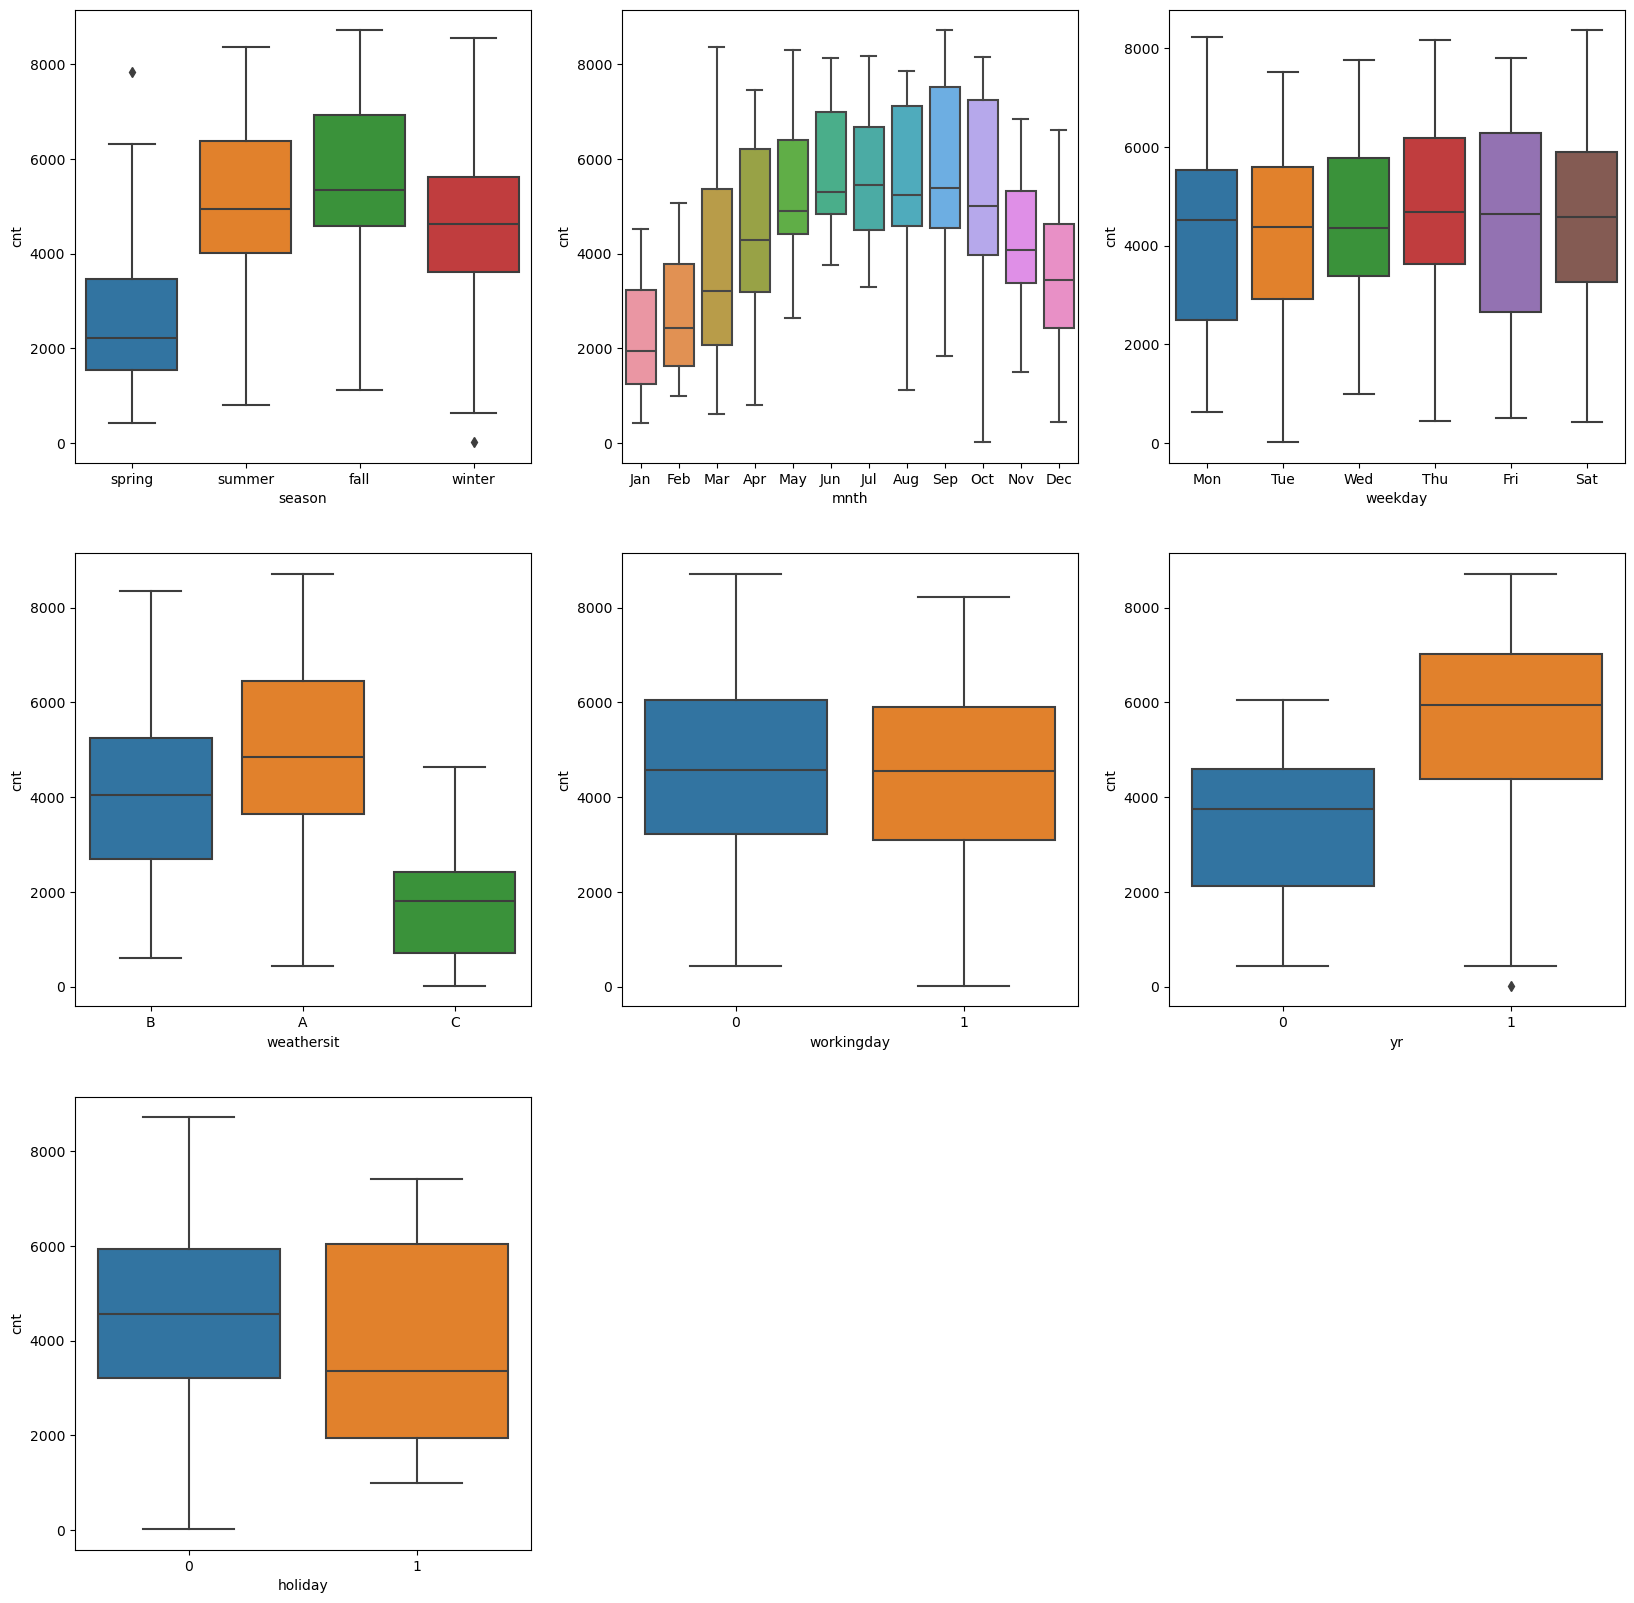

In [1173]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=dataset)
plt.subplot(3,3,2)
sns.boxplot(x='mnth',y='cnt',data=dataset)
plt.subplot(3,3,3)
sns.boxplot(x='weekday',y='cnt',data=dataset)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt',data=dataset)
plt.subplot(3,3,5)
sns.boxplot(x='workingday',y='cnt',data=dataset)
plt.subplot(3,3,6)
sns.boxplot(x='yr',y='cnt',data=dataset)
plt.subplot(3,3,7)
sns.boxplot(x='holiday',y='cnt',data=dataset)
plt.show()


In [1174]:
intVarlist =["casual","registered","cnt"]

for var in intVarlist:
    dataset[var] =dataset[var].astype("float")

In [1175]:
dataset_numeric = dataset.select_dtypes(include=['float64'])
dataset_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


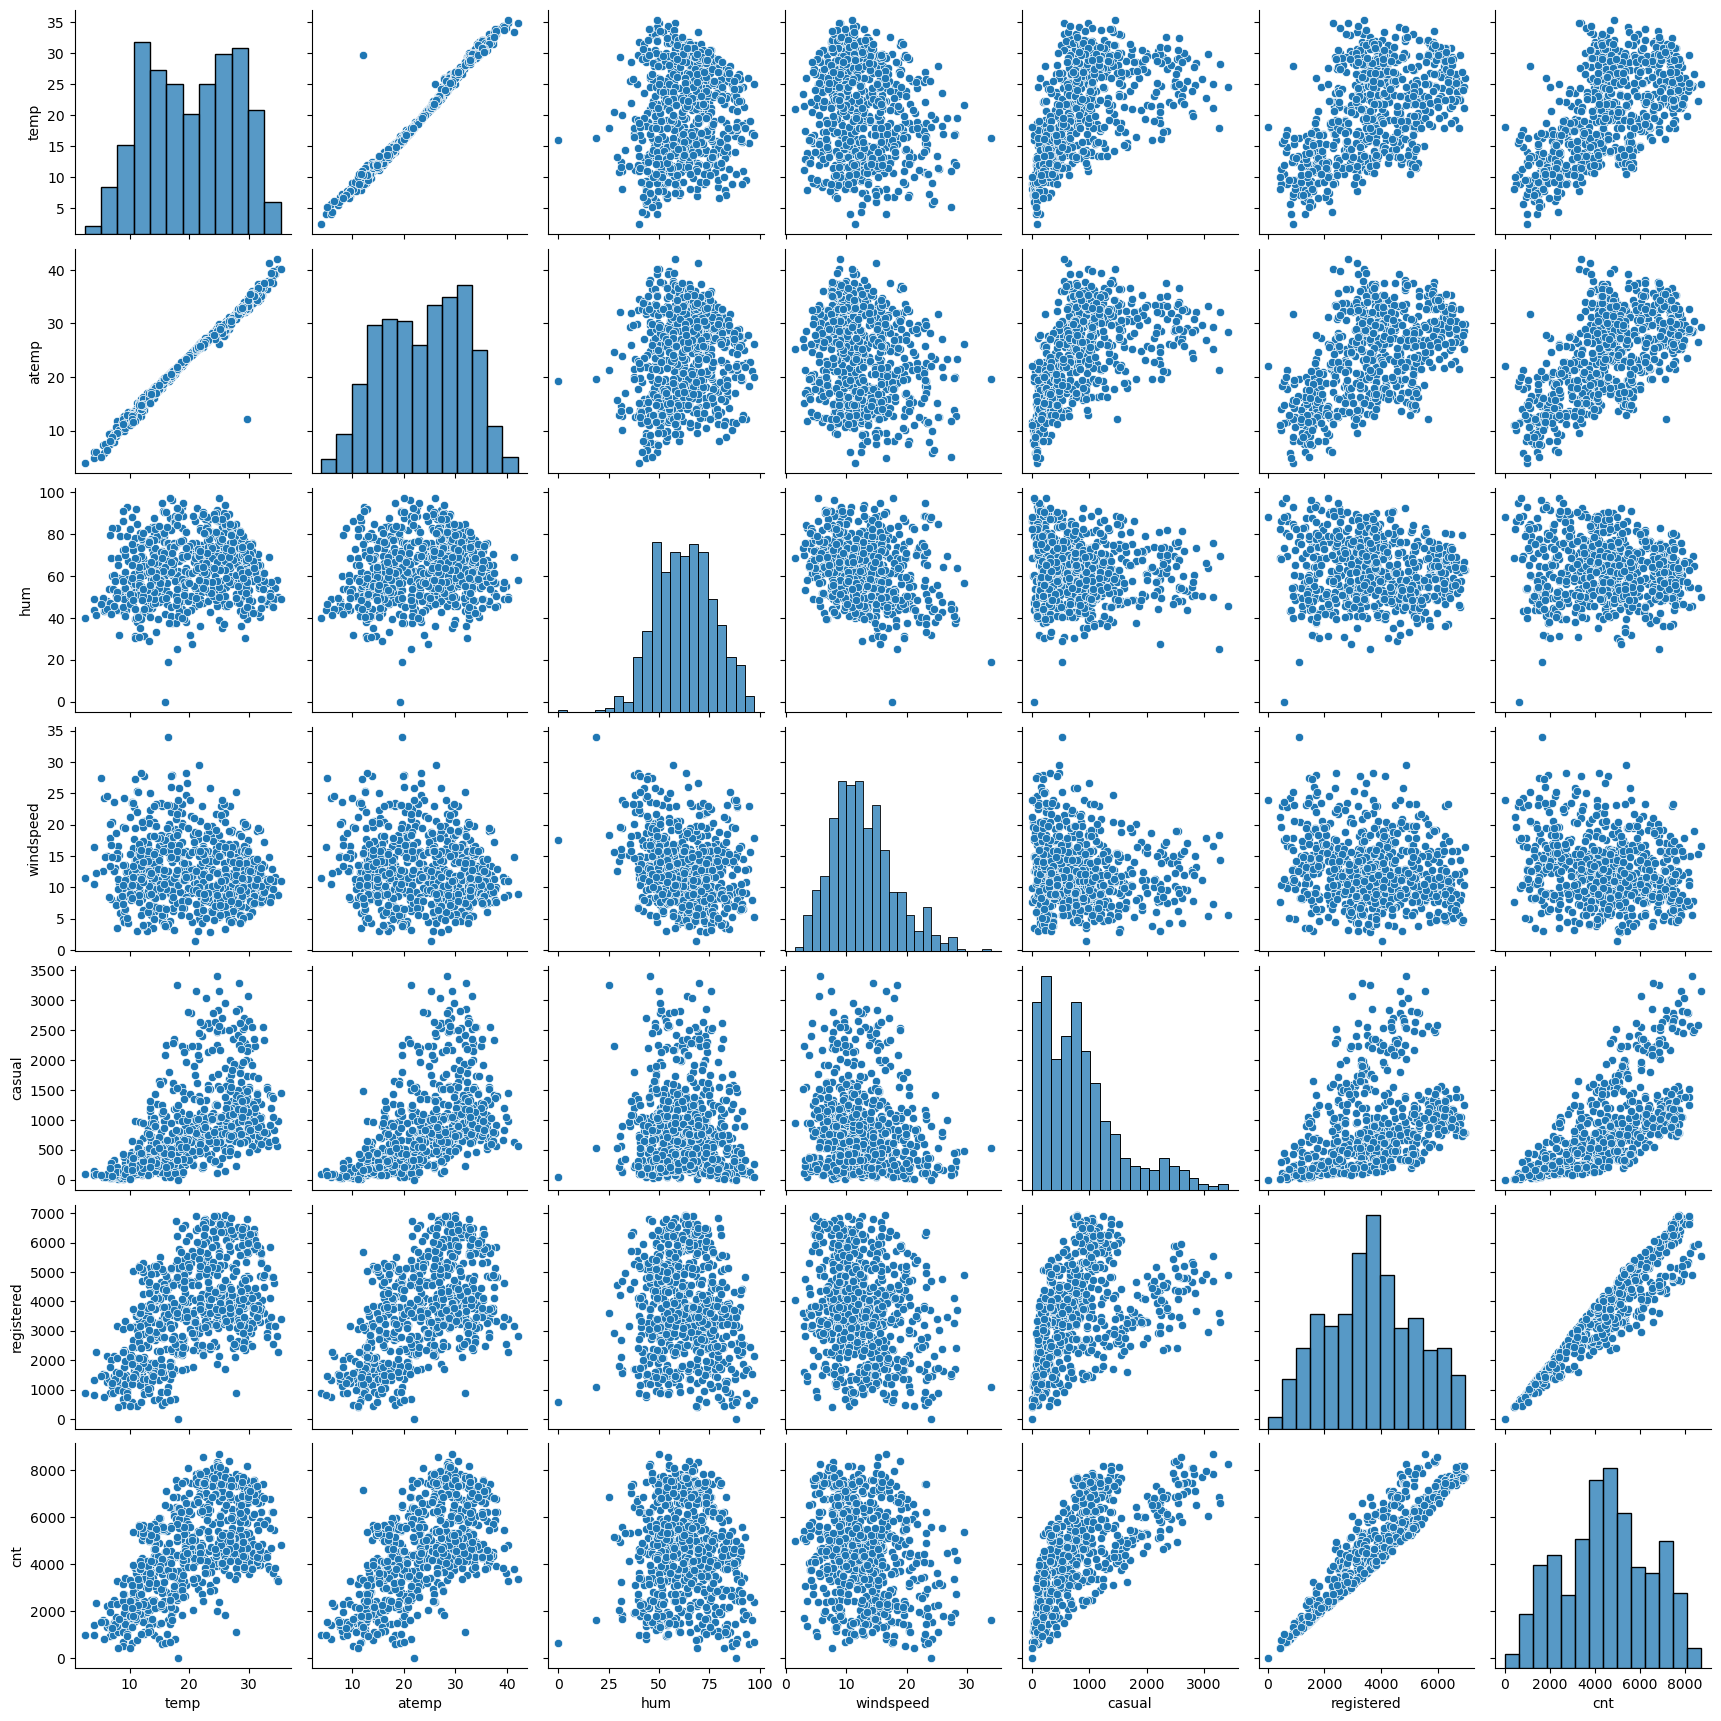

In [1176]:
sns.pairplot(dataset_numeric)
plt.show()

In [1177]:
cor=dataset_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

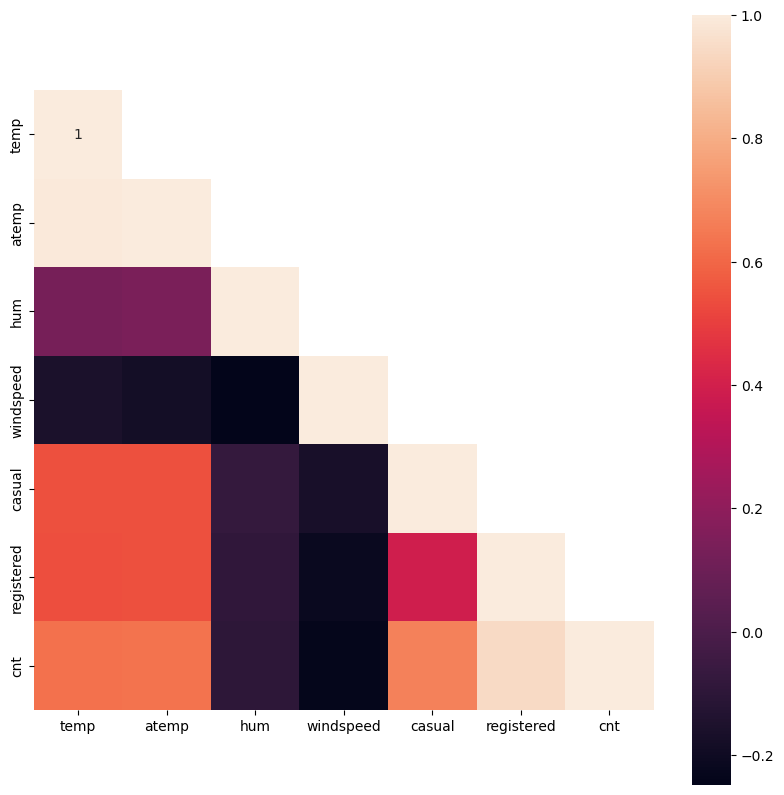

In [1181]:
#heatmap
mask =np.array(cor)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor,mask=mask,vmax=1,square=True,annot=True)

In [1182]:
#Removing atemp as it is highly corelated with temp
dataset.drop('atemp',axis=1,inplace=True)

In [1183]:
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,02-01-2018,spring,0,Jan,0,Tue,1,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,03-01-2018,spring,0,Jan,0,Wed,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,04-01-2018,spring,0,Jan,0,Thu,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,05-01-2018,spring,0,Jan,0,Fri,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,Dec,0,Fri,1,B,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,28-12-2019,spring,1,Dec,0,Sat,0,B,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,29-12-2019,spring,1,Dec,0,NaN,0,B,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,30-12-2019,spring,1,Dec,0,Mon,1,A,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [1184]:
#Data preparation

In [1185]:
dataset_categorical= dataset.select_dtypes(include=['object'])

In [1186]:
dataset_categorical.head()

,dteday,season,mnth,weekday,weathersit
0,01-01-2018,spring,Jan,Mon,B
1,02-01-2018,spring,Jan,Tue,B
2,03-01-2018,spring,Jan,Wed,A
3,04-01-2018,spring,Jan,Thu,A
4,05-01-2018,spring,Jan,Fri,A


In [1187]:
dataset_dummies= pd.get_dummies(dataset_categorical,drop_first=True)
dataset_dummies.head()

,dteday_01-01-2019,dteday_01-02-2018,dteday_01-02-2019,dteday_01-03-2018,dteday_01-03-2019,dteday_01-04-2018,dteday_01-04-2019,dteday_01-05-2018,dteday_01-05-2019,dteday_01-06-2018,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1188]:
#Drop categorical variable columns
dataset= dataset.drop(list(dataset_categorical.columns),axis=1)
dataset

,instant,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...
725,726,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,1,0,0,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,1,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [1189]:
dataset= dataset.drop(['instant'],axis=1,inplace=False)
dataset.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


#MODEL BUILDING AND EVALUATION

In [1191]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [1192]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(dataset,train_size=0.7,test_size=0.3,random_state=100)

In [1193]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0
728,1,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0
...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0
350,0,0,1,10.591653,56.0833,16.292189,275.0,2464.0,2739.0


In [1194]:
from sklearn.preprocessing import MinMaxScaler

In [1195]:
scaler=MinMaxScaler()

In [1196]:
var=["temp","hum","windspeed","casual","registered","cnt"]

df_train[var]=scaler.fit_transform(df_train[var])

In [1197]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


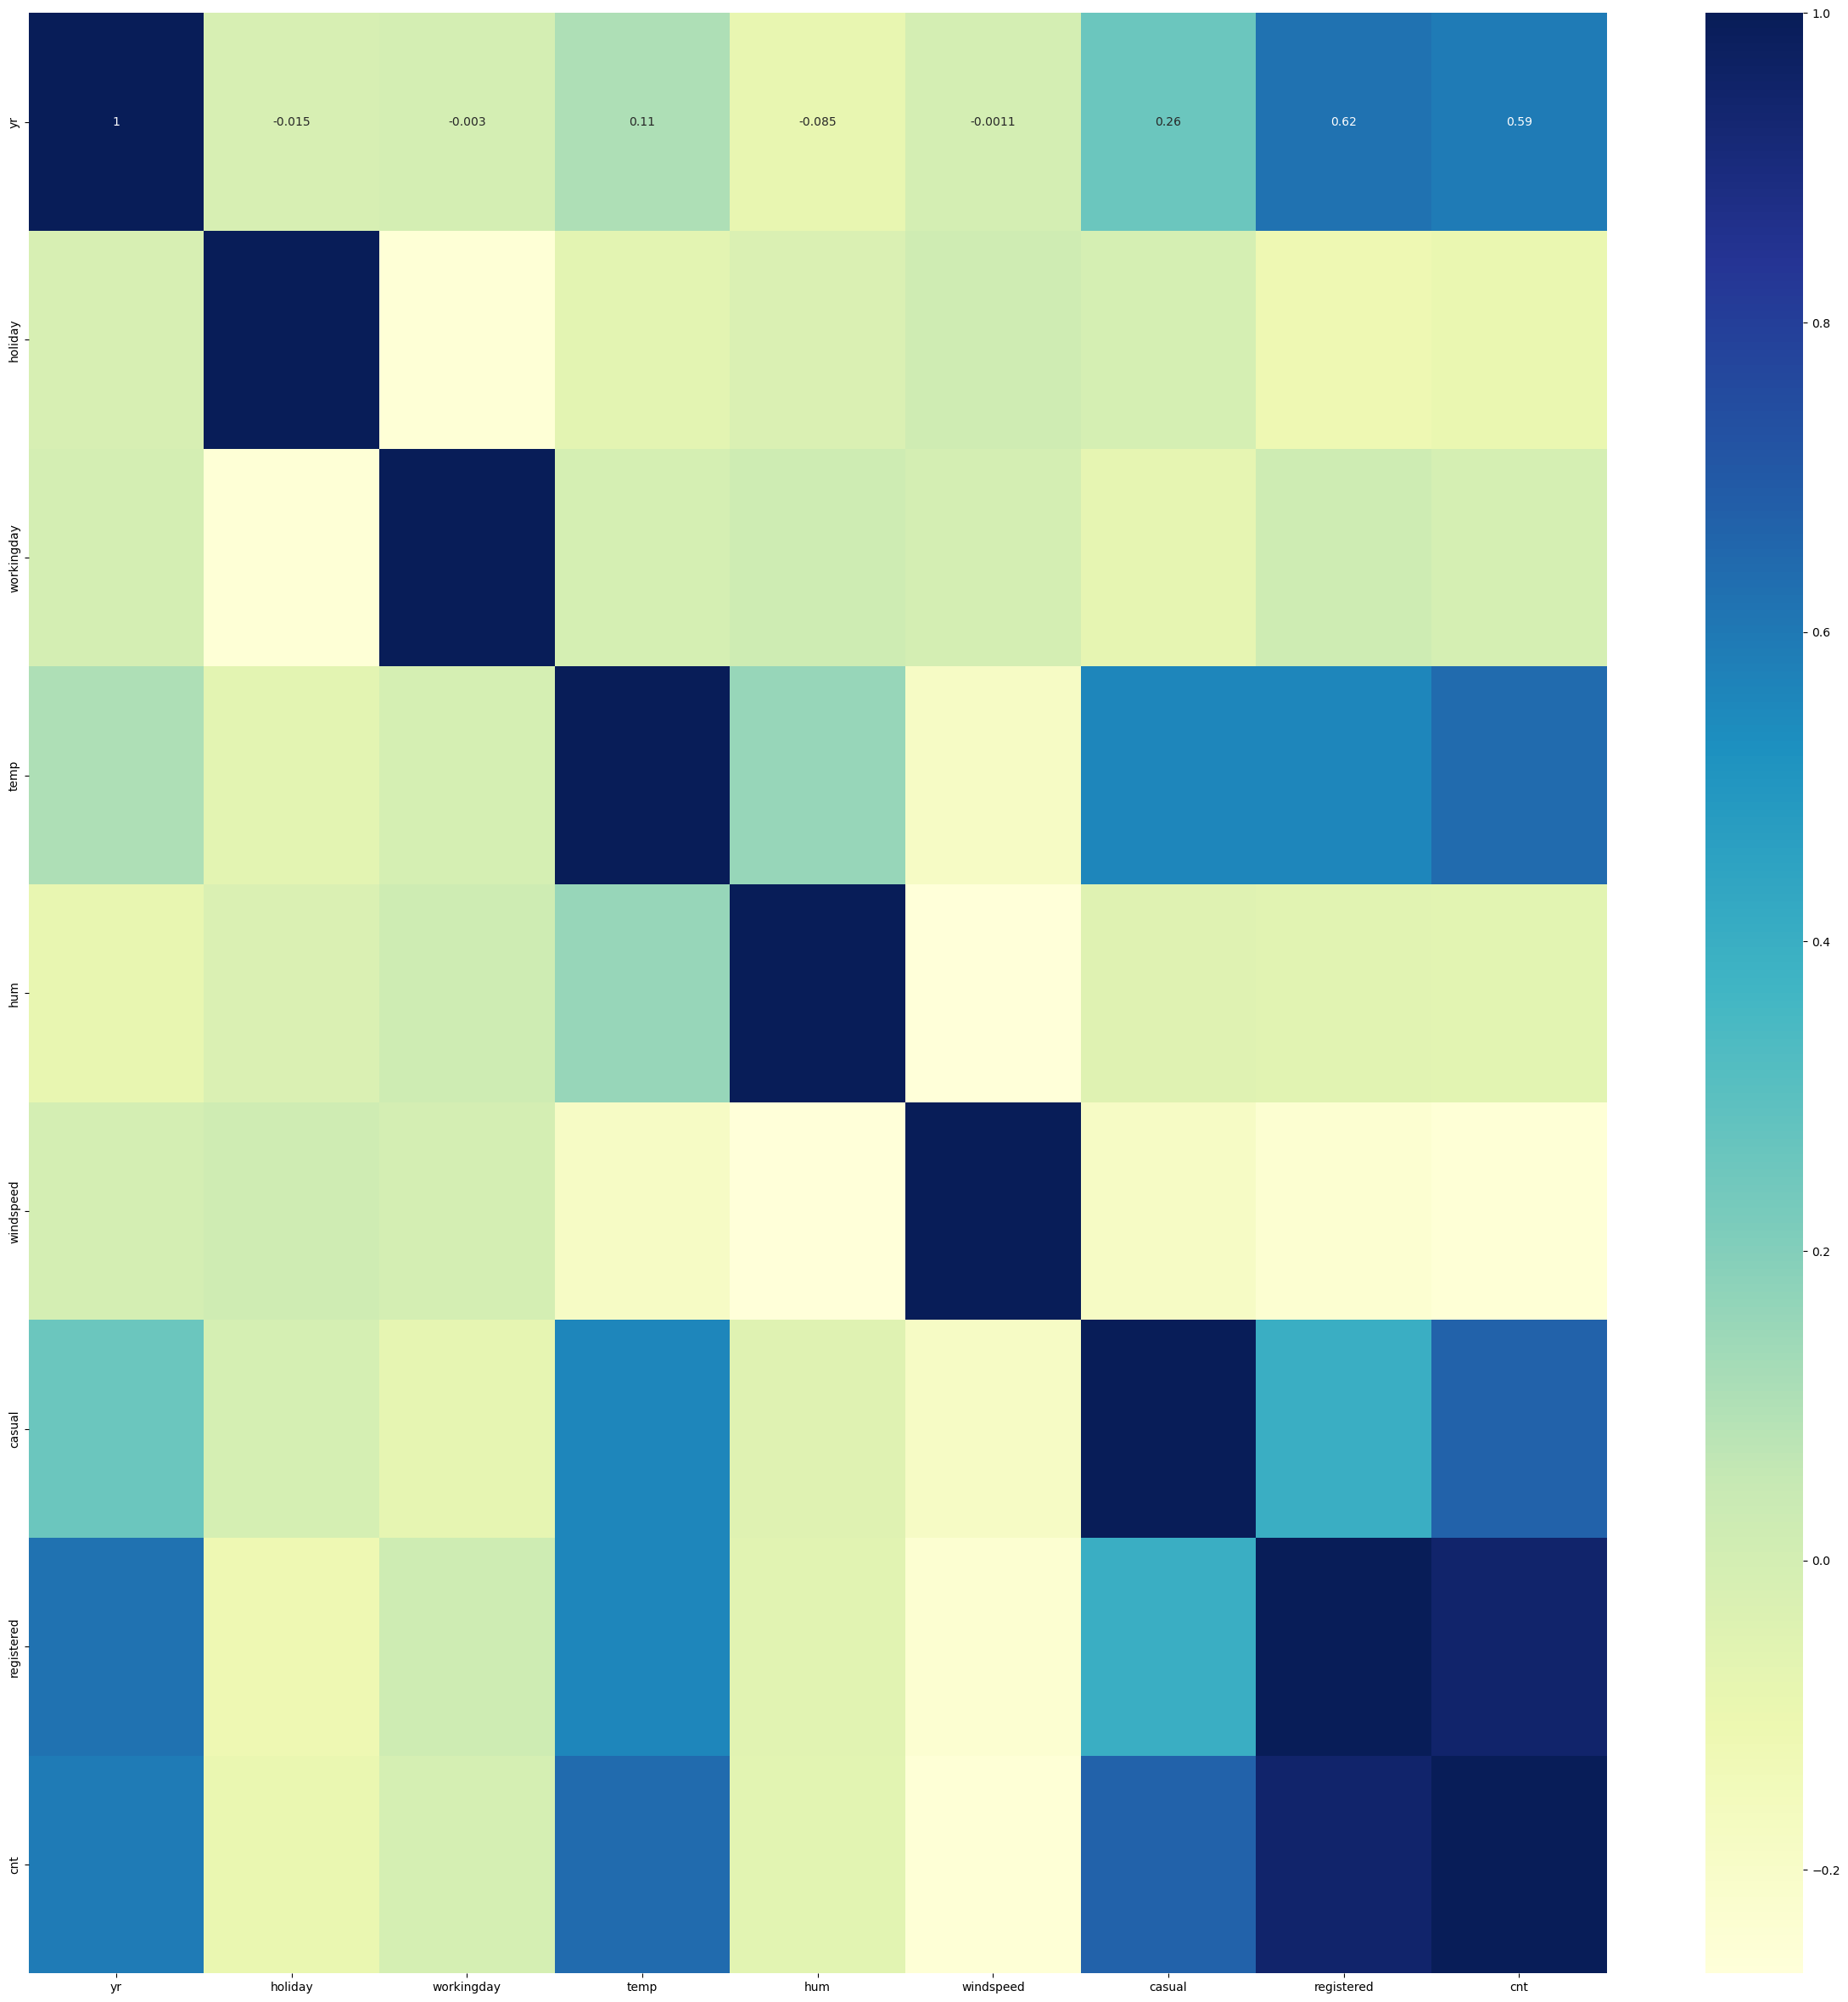

In [1198]:
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [1199]:
#Dividing into X and Y
Y_train=df_train.pop('cnt')
X_train=df_train.drop(["casual","registered"],axis=1)

In [1200]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed
653,1,0,1,0.509887,0.575354,0.300794
576,1,0,1,0.815169,0.725633,0.264686
426,1,0,0,0.442393,0.640189,0.255342
728,1,0,1,0.245101,0.498067,0.663106
482,1,0,0,0.395666,0.504508,0.188475


In [1201]:
np.asarray(df_train)

array([[1.        , 0.        , 1.        , ..., 0.30079362, 0.28040232,
        0.95177592],
       [1.        , 0.        , 1.        , ..., 0.26468552, 0.29442243,
        0.89922033],
       [1.        , 0.        , 0.        , ..., 0.25534248, 0.29076501,
        0.44614496],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11137874, 0.04175556,
        0.25382616],
       [0.        , 0.        , 1.        , ..., 0.43181554, 0.08320634,
        0.35287323],
       [0.        , 0.        , 1.        , ..., 0.52988098, 0.12160927,
        0.23909905]])

In [1202]:
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train)
lr=sm.OLS(Y_train,X_train_lm).fit()

In [1203]:
X_train_lm

,const,yr,holiday,workingday,temp,hum,windspeed
653,1.0,1,0,1,0.509887,0.575354,0.300794
576,1.0,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,1,0.245101,0.498067,0.663106
482,1.0,1,0,0,0.395666,0.504508,0.188475
...,...,...,...,...,...,...,...
526,1.0,1,0,1,0.824514,0.605840,0.355596
578,1.0,1,0,1,0.863973,0.679690,0.187140
53,1.0,0,0,1,0.202618,0.435939,0.111379
350,1.0,0,0,1,0.248216,0.577930,0.431816


In [1204]:
lr.params

const         0.332357
yr            0.231400
holiday      -0.078355
workingday   -0.006936
temp          0.570639
hum          -0.241022
windspeed    -0.246742
dtype: float64

In [1205]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [1206]:
print(lm.coef_)
print(lm.intercept_)

[ 0.23139965 -0.07835483 -0.00693642  0.57063879 -0.24102227 -0.24674194]
0.332356912380226


In [1207]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     234.2
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          4.13e-142
Time:                        15:07:47   Log-Likelihood:                 378.49
No. Observations:                 510   AIC:                            -743.0
Df Residuals:                     503   BIC:                            -713.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3324      0.033     10.170      0.000       0.268       0.397
yr             0.2314      0.010     22.271      0.000       0.211       0.252
holiday       -0.0784      0.034     -2.319      0.021      -0.145      -0.012
workingday    -0.0069      0.012     -0.591      0.555      -0.030       0.016
temp           0.5706      0.024     24.238      0.000       0.524       0.617
hum           -0.2410      0.037     -6.513      0.000      -0.314      -0.168
windspeed     -0.2467      0.032     -7.760      0.000      -0.309      -0.184
==============================================================================
Omnibus:                       17.868   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.494
Skew:                          -0.385   Prob(JB):                     3.55e-05
Kurtosis:                       3.610   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1208]:
#import rfe
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1209]:
lm = LinearRegression()
rfe1 = RFE(estimator=lm, n_features_to_select=15)

#fit with 15 feature
rfe1.fit(X_train,Y_train)
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True  True  True  True  True]
[1 1 1 1 1 1]


In [1210]:
col1=X_train.columns[rfe1.support_]

In [1211]:
col1

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed'], dtype='object')

In [1212]:
x_train_rfe1=X_train[col1]

X_train_rfe1=sm.add_constant(x_train_rfe1)
lm1=sm.OLS(Y_train,x_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              1565.
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                   4.20e-322
Time:                        15:07:47   Log-Likelihood:                          330.80
No. Observations:                 510   AIC:                                     -649.6
Df Residuals:                     504   BIC:                                     -624.2
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr             0.2518      0.011     22.517      0.000       0.230       0.274
holiday       -0.0342      0.037     -0.931      0.352      -0.106       0.038
workingday     0.0240      0.012      1.935      0.054      -0.000       0.048
temp           0.6507      0.024     26.734      0.000       0.603       0.698
hum            0.0518      0.025      2.033      0.043       0.002       0.102
windspeed     -0.0686      0.029     -2.355      0.019      -0.126      -0.011
==============================================================================
Omnibus:                       34.689   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.829
Skew:                          -0.530   Prob(JB):                     2.49e-11
Kurtosis:                       4.084   Cond. No.                         8.69
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1213]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1214]:
a = X_train_rfe1.drop('const',axis=1)

In [1215]:
#evaluating VIFs
vif =pd.DataFrame()
vif['features']=a.columns
vif['VIF']=[variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
4,hum,9.09
3,temp,6.34
5,windspeed,3.51
2,workingday,3.46
0,yr,2.00
1,holiday,1.08


In [1216]:
lm=LinearRegression()
rfe2 =RFE(estimator=lm,n_features_to_select=7)

rfe2.fit(X_train,Y_train)
print(rfe2.support_)
print(rfe2.ranking_)

[ True  True  True  True  True  True]
[1 1 1 1 1 1]


In [1219]:
col2=X_train.columns[rfe2.support_]

X_train_rfe2 =X_train[col2]
X_train_rfe2=sm.add_constant(X_train_rfe2)
lm2=sm.OLS(Y_train,X_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     234.2
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          4.13e-142
Time:                        15:07:48   Log-Likelihood:                 378.49
No. Observations:                 510   AIC:                            -743.0
Df Residuals:                     503   BIC:                            -713.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3324      0.033     10.170      0.000       0.268       0.397
yr             0.2314      0.010     22.271      0.000       0.211       0.252
holiday       -0.0784      0.034     -2.319      0.021      -0.145      -0.012
workingday    -0.0069      0.012     -0.591      0.555      -0.030       0.016
temp           0.5706      0.024     24.238      0.000       0.524       0.617
hum           -0.2410      0.037     -6.513      0.000      -0.314      -0.168
windspeed     -0.2467      0.032     -7.760      0.000      -0.309      -0.184
==============================================================================
Omnibus:                       17.868   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.494
Skew:                          -0.385   Prob(JB):                     3.55e-05
Kurtosis:                       3.610   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1220]:
#Evaluating VIFs
b=X_train_rfe2.drop('const',axis=1)
vif1 =pd.DataFrame()
vif1['features']=b.columns
vif1['VIF']=[variance_inflation_factor(b.values,i) for i in range(b.shape[1])]
vif1['VIF']=round(vif['VIF'],2)   
vif1=vif1.sort_values(by='VIF',ascending =False)
vif1

,features,VIF
4,hum,9.09
3,temp,6.34
5,windspeed,3.51
2,workingday,3.46
0,yr,2.00
1,holiday,1.08


In [1232]:
Y_train_cnt=lm2.predict(X_train_rfe2)

<Axes: ylabel='Density'>

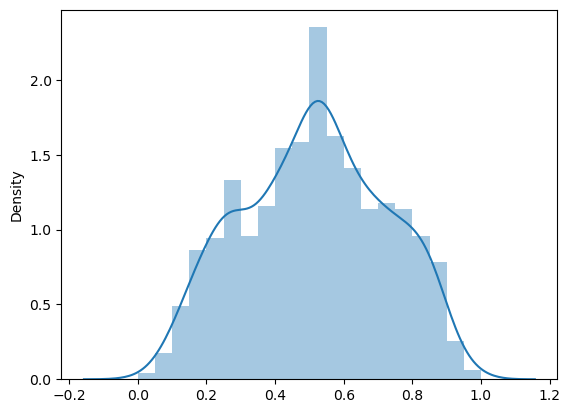

In [1238]:
fig=plt.figure()
sns.distplot((Y_train,Y_train_cnt),bins=20)

In [1239]:
df_test[var]=scaler.transform(df_test[var])
df_test

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
184,0,1,0,0.831783,0.657364,0.084219,0.933557,0.427086,0.692706
535,1,0,1,0.901354,0.610133,0.153728,0.265163,0.767976,0.712034
299,0,0,0,0.511964,0.837699,0.334206,0.072539,0.346376,0.303382
221,0,0,1,0.881625,0.437098,0.339570,0.268820,0.559630,0.547400
152,0,0,0,0.817246,0.314298,0.537414,0.223712,0.608143,0.569029
...,...,...,...,...,...,...,...,...,...
400,1,0,1,0.257562,0.708888,0.287411,0.096312,0.376697,0.336516
702,1,0,1,0.519232,0.756118,0.283397,0.167327,0.871354,0.757478
127,0,0,1,0.584649,0.650923,0.069510,0.426394,0.420445,0.495973
640,1,0,1,0.745598,0.817947,0.052115,0.221274,0.985273,0.868615


In [1259]:
Y_test=df_test.pop('cnt')
X_test=df_test.drop(["casual","registered"],axis=1)

In [1262]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed
184,0,1,0,0.831783,0.657364,0.084219
535,1,0,1,0.901354,0.610133,0.153728
299,0,0,0,0.511964,0.837699,0.334206
221,0,0,1,0.881625,0.437098,0.339570
152,0,0,0,0.817246,0.314298,0.537414


In [1263]:
c=X_train_rfe2.drop('const',axis=1)

In [1265]:
col2=c.columns

In [1266]:
X_test_rfe2=X_test[col2]

In [1269]:
X_test_rfe2=sm.add_constant(X_test_rfe2)

In [1270]:
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       219 non-null    float64
 1   yr          219 non-null    int64  
 2   holiday     219 non-null    int64  
 3   workingday  219 non-null    int64  
 4   temp        219 non-null    float64
 5   hum         219 non-null    float64
 6   windspeed   219 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 13.7 KB


In [1271]:
Y_pred=lm2.predict(X_test_rfe2)

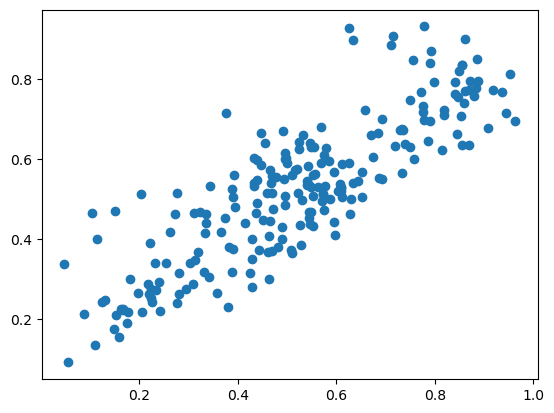

In [1272]:
plt.figure()
plt.scatter(Y_test,Y_pred)

In [1273]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.714182420014629

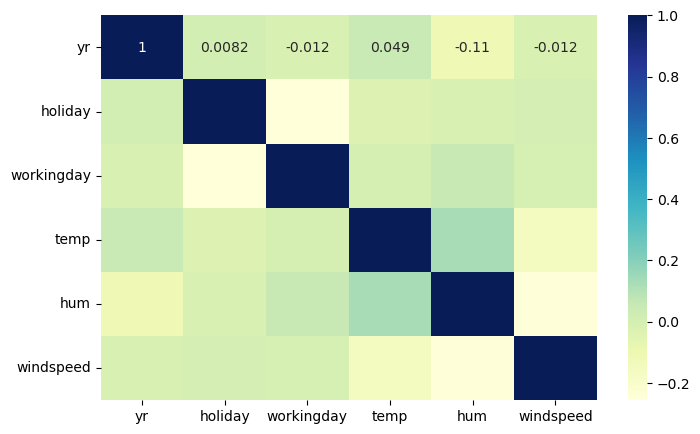

In [1279]:
plt.figure(figsize=(8,5))
sns.heatmap(dataset[col2].corr(),cmap="YlGnBu",annot=True)
plt.show()